In [1]:
!pip install nltk==3.8.1

import nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.


In [2]:
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

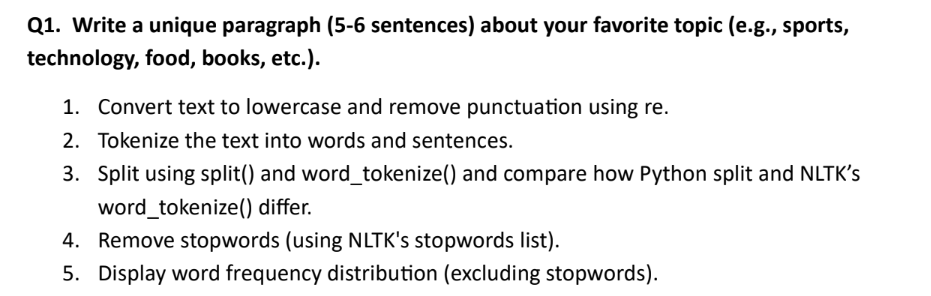

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

paragraph = """Technology is evolving rapidly, bringing innovation to our daily lives.
Artificial intelligence, machine learning, and blockchain are changing industries.
With smartphones and smart devices, information is at our fingertips.
The internet of things is connecting the world in unimaginable ways.
Such advancements are creating endless opportunities in education, health, and finance."""
text_clean = re.sub(r'[^\w\s]', '', paragraph.lower())
words_split = text_clean.split()
words_tokenized = word_tokenize(text_clean)
sentences = sent_tokenize(paragraph)

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words_tokenized if w not in stop_words]

fdist = FreqDist(filtered_words)

print("Python split():", words_split)
print("\nNLTK word_tokenize():", words_tokenized)
print("\nSentences:", sentences)
print("\nFiltered Words:", filtered_words)
print("\nFrequency Distribution:")
print(fdist.most_common())

Python split(): ['technology', 'is', 'evolving', 'rapidly', 'bringing', 'innovation', 'to', 'our', 'daily', 'lives', 'artificial', 'intelligence', 'machine', 'learning', 'and', 'blockchain', 'are', 'changing', 'industries', 'with', 'smartphones', 'and', 'smart', 'devices', 'information', 'is', 'at', 'our', 'fingertips', 'the', 'internet', 'of', 'things', 'is', 'connecting', 'the', 'world', 'in', 'unimaginable', 'ways', 'such', 'advancements', 'are', 'creating', 'endless', 'opportunities', 'in', 'education', 'health', 'and', 'finance']

NLTK word_tokenize(): ['technology', 'is', 'evolving', 'rapidly', 'bringing', 'innovation', 'to', 'our', 'daily', 'lives', 'artificial', 'intelligence', 'machine', 'learning', 'and', 'blockchain', 'are', 'changing', 'industries', 'with', 'smartphones', 'and', 'smart', 'devices', 'information', 'is', 'at', 'our', 'fingertips', 'the', 'internet', 'of', 'things', 'is', 'connecting', 'the', 'world', 'in', 'unimaginable', 'ways', 'such', 'advancements', 'are'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


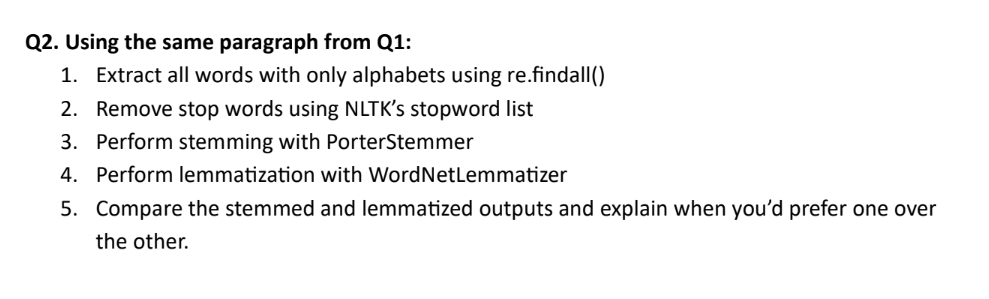

In [5]:
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

alpha_words = re.findall(r'\b[a-zA-Z]+\b', text_clean)

filtered_alpha = [w for w in alpha_words if w not in stop_words]

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

porter_stems = [porter.stem(w) for w in filtered_alpha]
lancaster_stems = [lancaster.stem(w) for w in filtered_alpha]
lemmas = [lemmatizer.lemmatize(w) for w in filtered_alpha]

print("Original Words:", filtered_alpha)
print("\nPorter Stemmer:", porter_stems)
print("\nLancaster Stemmer:", lancaster_stems)
print("\nLemmatized:", lemmas)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Original Words: ['technology', 'evolving', 'rapidly', 'bringing', 'innovation', 'daily', 'lives', 'artificial', 'intelligence', 'machine', 'learning', 'blockchain', 'changing', 'industries', 'smartphones', 'smart', 'devices', 'information', 'fingertips', 'internet', 'things', 'connecting', 'world', 'unimaginable', 'ways', 'advancements', 'creating', 'endless', 'opportunities', 'education', 'health', 'finance']

Porter Stemmer: ['technolog', 'evolv', 'rapidli', 'bring', 'innov', 'daili', 'live', 'artifici', 'intellig', 'machin', 'learn', 'blockchain', 'chang', 'industri', 'smartphon', 'smart', 'devic', 'inform', 'fingertip', 'internet', 'thing', 'connect', 'world', 'unimagin', 'way', 'advanc', 'creat', 'endless', 'opportun', 'educ', 'health', 'financ']

Lancaster Stemmer: ['technolog', 'evolv', 'rapid', 'bring', 'innov', 'dai', 'liv', 'art', 'intellig', 'machin', 'learn', 'blockchain', 'chang', 'industry', 'smartphon', 'smart', 'dev', 'inform', 'fingertip', 'internet', 'thing', 'connect

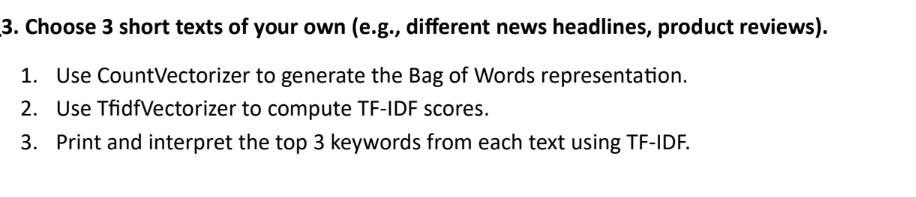

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

texts = [
    "The phone has great battery life and performance.",
    "This laptop is lightweight and perfect for travel.",
    "The camera quality of this phone is amazing in low light."
]

count_vec = CountVectorizer()
bow = count_vec.fit_transform(texts)
print("Bag of Words:\n", bow.toarray())

tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(texts)

feature_names = tfidf_vec.get_feature_names_out()

for i, row in enumerate(tfidf.toarray()):
    top_indices = np.argsort(row)[::-1][:3]
    top_keywords = [(feature_names[j], row[j]) for j in top_indices]
    print(f"\nText {i+1} - Top 3 TF-IDF Keywords:", top_keywords)


Bag of Words:
 [[0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0]
 [0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1]
 [1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0]]

Text 1 - Top 3 TF-IDF Keywords: [('performance', 0.38532288602703124), ('life', 0.38532288602703124), ('has', 0.38532288602703124)]

Text 2 - Top 3 TF-IDF Keywords: [('travel', 0.38532288602703124), ('perfect', 0.38532288602703124), ('for', 0.38532288602703124)]

Text 3 - Top 3 TF-IDF Keywords: [('quality', 0.3276734545947569), ('camera', 0.3276734545947569), ('in', 0.3276734545947569)]


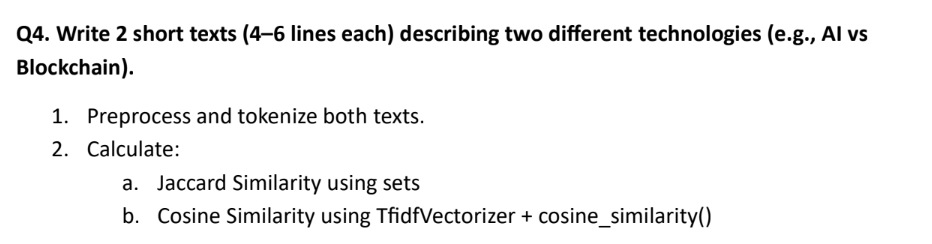

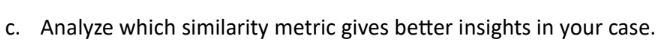

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

text1 = """Artificial Intelligence enables machines to learn from data and perform tasks like humans.
It powers applications such as virtual assistants, language translation, and autonomous driving."""

text2 = """Blockchain is a decentralized ledger that records transactions securely.
It eliminates the need for intermediaries and powers cryptocurrencies like Bitcoin and Ethereum."""

pre1 = re.sub(r'[^\w\s]', '', text1.lower())
pre2 = re.sub(r'[^\w\s]', '', text2.lower())

tokens1 = set(pre1.split())
tokens2 = set(pre2.split())

jaccard = len(tokens1 & tokens2) / len(tokens1 | tokens2)
print("Jaccard Similarity:", jaccard)

tfidf_vec = TfidfVectorizer()
vectors = tfidf_vec.fit_transform([text1, text2])
cos_sim = cosine_similarity(vectors[0:1], vectors[1:2])
print("Cosine Similarity:", cos_sim[0][0])


Jaccard Similarity: 0.0975609756097561
Cosine Similarity: 0.1652026439285034


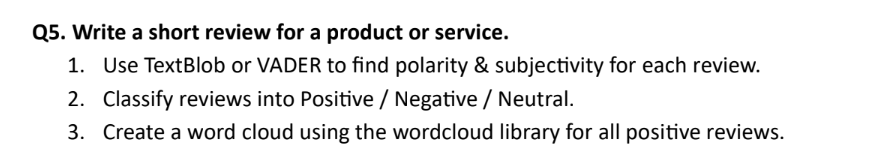


Review: I absolutely love this product! It works like a charm and exceeded my expectations.
Sentiment: Positive

Review: This was a waste of money. Totally disappointed.
Sentiment: Negative

Review: It's okay, not too great but not bad either.
Sentiment: Positive

Review: Fantastic service and excellent quality!
Sentiment: Positive

Review: The product is average, nothing special.
Sentiment: Positive


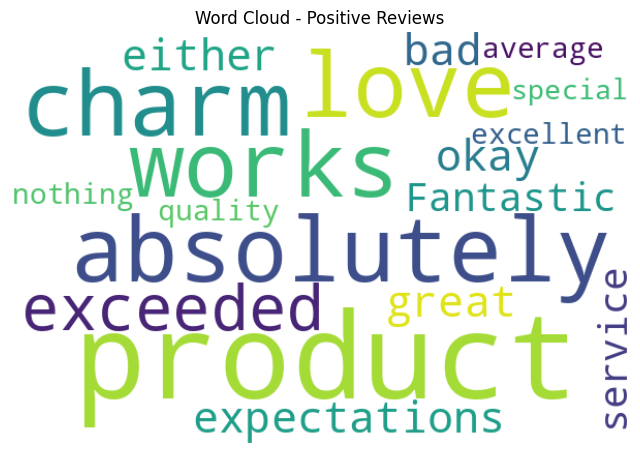

In [8]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "I absolutely love this product! It works like a charm and exceeded my expectations.",
    "This was a waste of money. Totally disappointed.",
    "It's okay, not too great but not bad either.",
    "Fantastic service and excellent quality!",
    "The product is average, nothing special."
]

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

classified_reviews = [(rev, get_sentiment(rev)) for rev in reviews]

for review, sentiment in classified_reviews:
    print(f"\nReview: {review}\nSentiment: {sentiment}")

positive_text = ' '.join([rev for rev, sentiment in classified_reviews if sentiment == "Positive"])

wc = WordCloud(background_color='white', width=600, height=400).generate(positive_text)

plt.figure(figsize=(8, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()


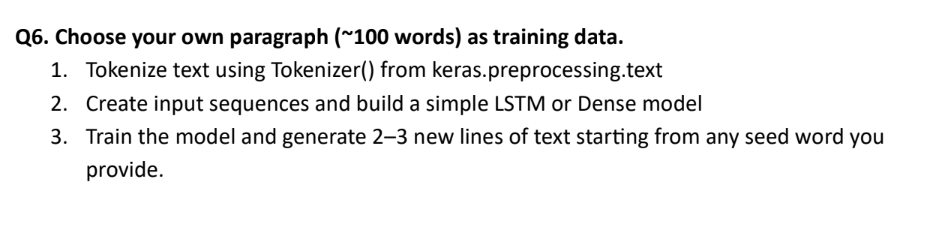

In [10]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [11]:

paragraph = """
Technology is evolving faster than ever. Artificial Intelligence and Machine Learning are reshaping industries.
From healthcare to finance, automation is streamlining processes. Data-driven decisions are now the norm in business.
"""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
tokens = tokenizer.texts_to_sequences([paragraph])[0]

for i in range(1, len(tokens)):
    n_gram = tokens[:i+1]
    input_sequences.append(n_gram)

max_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = np.array(y)

model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=300, verbose=0)

seed = "Artificial Intelligence"
next_words = 5

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            seed += " " + word
            break

print("\nGenerated Text:")
print(seed)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Generated Text:
Artificial Intelligence is faster than ever artificial
